# Fig 7 and Supporting Fig S6

This notebook generates the plots for the learning experiments presented in Fig 7 and supporting Fig S6. 

The data set generated for the learning experiments is located in `data/ExperimentMaze*`. This data set can be reproduced by running

```
python -m main -e ExperimentSetMazeQLearning              # Q-learning baseline
python -m main -e ExperimentSetMazeSFLearning             # SF-learning baseline
python -m main -e ExperimentSetMazeSFTransfer             # SF-learning with SF transfer
python -m main -e ExperimentSetMazeMaximizingQLearning    # Reward-maximizing model with Q-learning
python -m main -e ExperimentSetMazePredictiveQLearning    # Reward-predictive model with Q-learning
python -m main -e ExperimentSetMazePredictiveSFLearning   # Reward-predictive model with SF-learning
```

The following cell parses the entire dataset. This may take a few minutes.

In [1]:
import warnings; warnings.filterwarnings('ignore')

import rewardpredictive as rp
import rlutils as rl
import sftransfer as sf
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
import matplotlib.colors as colors
from matplotlib.patches import Rectangle

from matplotlib import rc
rc('font', **{'family': 'serif', 'size': 9})
rc('text', usetex=True)

import os
os.makedirs('figure/maze', exist_ok=True)

es_qlearning = rp.ExperimentSetMazeQLearning.load()
es_maximizing = rp.ExperimentSetMazeMaximizingQLearning.load()
es_predictive = rp.ExperimentSetMazePredictiveQLearning.load()

exp_qlearning = es_qlearning.get_best_experiment()
exp_maximizing = es_maximizing.get_best_experiment()
exp_predictive = es_predictive.get_best_experiment()

es_sflearning = rp.ExperimentSetMazeSFLearning.load()
es_sftransfer = rp.ExperimentSetMazeSFTransfer.load()
es_predictive_sf = rp.ExperimentSetMazePredictiveSFLearning.load()

exp_sflearning = es_sflearning.get_best_experiment()
exp_sftransfer = es_sftransfer.get_best_experiment()
exp_predictive_sf = es_predictive_sf.get_best_experiment()

In [2]:
! mkdir -p figure/maze

### Fig 7A

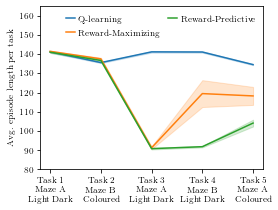

In [3]:
rp.plot_maze_task_ep_len(
    experiment_list=[exp_qlearning, exp_maximizing, exp_predictive], 
    label_list=['Q-learning', 'Reward-Maximizing', 'Reward-Predictive'], 
    color_list=['C0', 'C1', 'C2'],
    figsize=(4, 3)
)
plt.savefig('figure/maze/steps_comparison_q.pdf', bbox_inches='tight', pad_inches=.05, transparent=True)

### Fig 7C

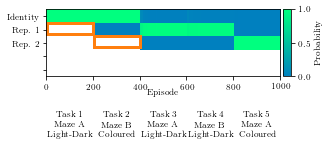

In [4]:
rp.plot_maze_posterior(exp_predictive.results['posterior'][0])
plt.gca().add_patch(
    Rectangle(
        (5,1.5),
        195, 0.8,
        linewidth=3,
        edgecolor='C1',
        facecolor='none'
    )
)
plt.gca().add_patch(
    Rectangle(
        (205,2.5),
        195, 0.8,
        linewidth=3,
        edgecolor='C1',
        facecolor='none'
    )
)
plt.savefig('figure/maze/posterior_predictive.pdf', bbox_inches='tight', pad_inches=.05, transparent=True)

### Fig 7D

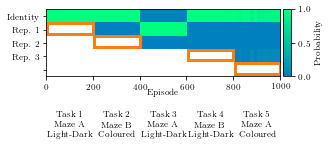

In [5]:
rp.plot_maze_posterior(exp_maximizing.results['posterior'][1])
plt.gca().add_patch(
    Rectangle(
        (5, 1.5),
        195, 0.8,
        linewidth=3,
        edgecolor='C1',
        facecolor='none'
    )
)
plt.gca().add_patch(
    Rectangle(
        (205,2.5),
        195, 0.8,
        linewidth=3,
        edgecolor='C1',
        facecolor='none'
    )
)
plt.gca().add_patch(
    Rectangle(
        (605, 3.5),
        195, 0.8,
        linewidth=3,
        edgecolor='C1',
        facecolor='none'
    )
)
plt.gca().add_patch(
    Rectangle(
        (805, 4.5),
        195, 0.8,
        linewidth=3,
        edgecolor='C1',
        facecolor='none'
    )
)
plt.savefig('figure/maze/posterior_maximizing.pdf', bbox_inches='tight', pad_inches=.05, transparent=True)

### Supplemental Fig S6 (Reward-Maximizing Model)

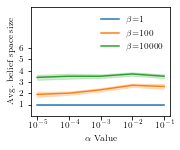

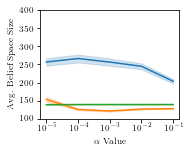

In [6]:
def hparam_alpha_beta(alpha, beta):
    return {
        rp.experiment.ExperimentMazeMaximizingQLearning.HP_LEARNING_RATE: 0.9,
        rp.experiment.ExperimentMazeMaximizingQLearning.HP_BETA: beta,
        rp.experiment.ExperimentMazeMaximizingQLearning.HP_ALPHA: alpha
    }
rp.plot_alpha_vs_belief_space_size(es_maximizing, hparam_alpha_beta, legend=True)
plt.savefig('figure/maze/alpha_range_maximizing_size.pdf', bbox_inches='tight', pad_inches=.05, transparent=True)
rp.plot_alpha_vs_episode_length(es_maximizing, hparam_alpha_beta)
plt.savefig('figure/maze/alpha_range_maximizing_len.pdf', bbox_inches='tight', pad_inches=.05, transparent=True)

### Supplemental Fig S6 (Reward-Predictive Model)

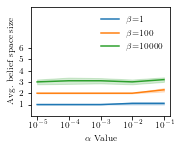

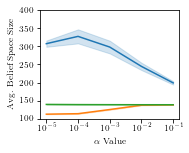

In [7]:
def hparam_alpha_beta(alpha, beta):
    return {
        rp.experiment.ExperimentMazePredictiveQLearning.HP_LEARNING_RATE: 0.9,
        rp.experiment.ExperimentMazePredictiveQLearning.HP_BETA: beta,
        rp.experiment.ExperimentMazePredictiveQLearning.HP_ALPHA: alpha
    }
rp.plot_alpha_vs_belief_space_size(es_predictive, hparam_alpha_beta, legend=True)
plt.savefig('figure/maze/alpha_range_predictive_size.pdf', bbox_inches='tight', pad_inches=.05, transparent=True)
rp.plot_alpha_vs_episode_length(es_predictive, hparam_alpha_beta)
plt.savefig('figure/maze/alpha_range_predictive_len.pdf', bbox_inches='tight', pad_inches=.05, transparent=True)

### Fig 7B

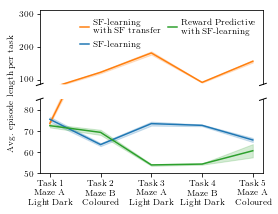

In [8]:
rp.plot_maze_task_ep_len_broken_yaxis(
    experiment_list=[exp_sftransfer, exp_sflearning, exp_predictive_sf], 
    label_list=['SF-learning\nwith SF transfer', 'SF-learning', 'Reward Predictive\nwith SF-learning'], 
    color_list=['C1', 'C0', 'C2']
)
plt.savefig('figure/maze/steps_comparison_sf.pdf', bbox_inches='tight', pad_inches=.05, transparent=True)

### Posterior Plot of Reward-Predictive Model Combined With SF-learning

This plot was not included with the paper.

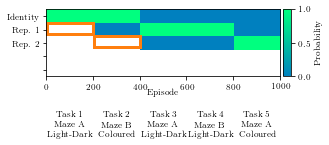

In [9]:
rp.plot_maze_posterior(exp_predictive_sf.results['posterior'][0])
plt.gca().add_patch(
    Rectangle(
        (5,1.5),
        195, 0.8,
        linewidth=3,
        edgecolor='C1',
        facecolor='none'
    )
)
plt.gca().add_patch(
    Rectangle(
        (205,2.5),
        195, 0.8,
        linewidth=3,
        edgecolor='C1',
        facecolor='none'
    )
)
plt.savefig('figure/maze/posterior_predictive_sf.pdf', bbox_inches='tight', pad_inches=.05, transparent=True)

### Belief Space Size and Episode Length for Reward-Predictive Model Combined With SF-learning

This plot was not included with the paper.

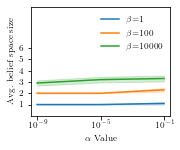

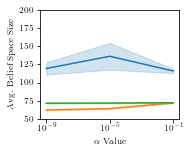

In [10]:
def hparam_alpha_beta(alpha, beta):
    return {
        rp.experiment.ExperimentMazePredictiveSFLearning.HP_LEARNING_RATE_SF: 0.5,
        rp.experiment.ExperimentMazePredictiveSFLearning.HP_LEARNING_RATE_REWARD: 0.9,
        rp.experiment.ExperimentMazePredictiveSFLearning.HP_BETA: beta,
        rp.experiment.ExperimentMazePredictiveSFLearning.HP_ALPHA: alpha
    }
rp.plot_alpha_vs_belief_space_size(es_predictive_sf, hparam_alpha_beta, legend=True)
plt.savefig('figure/maze/alpha_range_predictive_sf_size.pdf', bbox_inches='tight', pad_inches=.05, transparent=True)
rp.plot_alpha_vs_episode_length(es_predictive_sf, hparam_alpha_beta)
plt.ylim([50, 200])
plt.savefig('figure/maze/alpha_range_predictive_sf_len.pdf', bbox_inches='tight', pad_inches=.05, transparent=True)